In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.integrate import solve_ivp
from SIR_functions import *

In [39]:
model?

Reproduction number R0= 0.9956709956709958
Globally asymptotically stable if beta <=d+nu+mu0. This is False


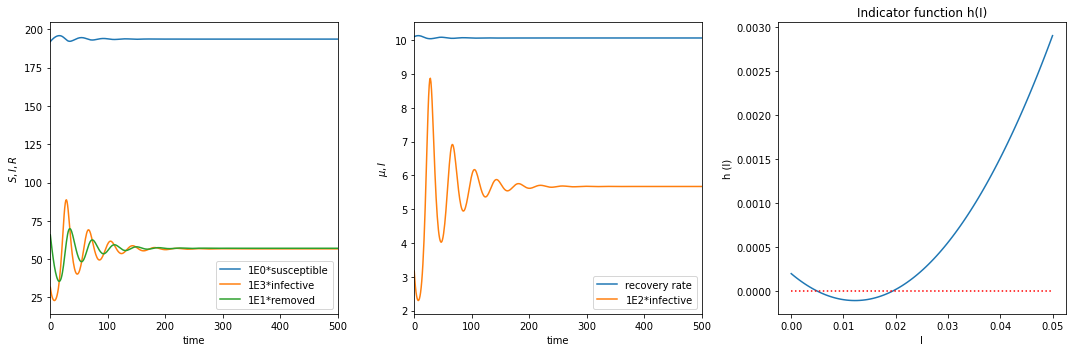

In [2]:
# parameters
random_state = 12345
t_0 = 0
t_end = 1000
NT = t_end-t_0
# if these error tolerances are set too high, the solution will be qualitatively (!) wrong
rtol = 1e-8
atol = 1e-8

# SIR model parameters
beta = 11.5
A = 20
d = 0.1
nu = 1
b = 0.01 # try to set this to 0.01, 0.020, ..., 0.022, ..., 0.03
mu0 = 10   # minimum recovery rate
mu1 = 10.45  # maximum recovery rate

# information
print("Reproduction number R0=", R0(beta, d, nu, mu1))
print('Globally asymptotically stable if beta <=d+nu+mu0. This is', beta <= d+nu+mu0)

# simulation
rng = np.random.default_rng(random_state)

SIM0 = rng.uniform(low=(190, 0, 1), high=(199,0.1,8), size=(3,))

time = np.linspace(t_0,t_end,NT)
sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='LSODA', rtol=rtol, atol=atol)

fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(sol.t, sol.y[0]-0*sol.y[0][0], label='1E0*susceptible');
ax[0].plot(sol.t, 1e3*sol.y[1]-0*sol.y[1][0], label='1E3*infective');
ax[0].plot(sol.t, 1e1*sol.y[2]-0*sol.y[2][0], label='1E1*removed');
ax[0].set_xlim([0, 500])
ax[0].legend();
ax[0].set_xlabel("time")
ax[0].set_ylabel(r"$S,I,R$")

ax[1].plot(sol.t, mu(b, sol.y[1], mu0, mu1), label='recovery rate')
ax[1].plot(sol.t, 1e2*sol.y[1], label='1E2*infective');
ax[1].set_xlim([0, 500])
ax[1].legend();
ax[1].set_xlabel("time")
ax[1].set_ylabel(r"$\mu,I$")

I_h = np.linspace(-0.,0.05,100)
ax[2].plot(I_h, h(I_h, mu0, mu1, beta, A, d, nu, b));
ax[2].plot(I_h, 0*I_h, 'r:')
#ax[2].set_ylim([-0.1,0.05])
ax[2].set_title("Indicator function h(I)")
ax[2].set_xlabel("I")
ax[2].set_ylabel("h (I)")

fig.tight_layout()

0.01 The solver successfully reached the end of the integration interval.
0.015 The solver successfully reached the end of the integration interval.
0.02 The solver successfully reached the end of the integration interval.
0.021 The solver successfully reached the end of the integration interval.
0.022 The solver successfully reached the end of the integration interval.
0.023 The solver successfully reached the end of the integration interval.
0.024 The solver successfully reached the end of the integration interval.
0.025 The solver successfully reached the end of the integration interval.
0.03 The solver successfully reached the end of the integration interval.


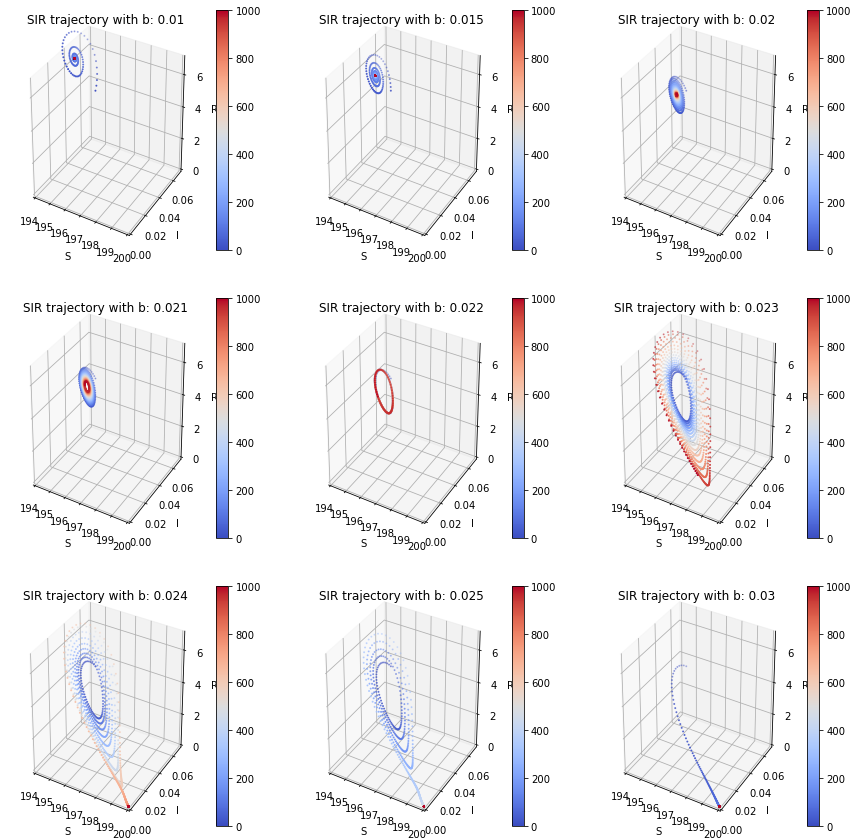

In [4]:
import math
cmap = ["BuPu", "Purples", "bwr"][1]

t_0 = 0
t_end = int(1e3)
num_iter = math.ceil((0.03-0.01)/0.001)

SIM0 = [195.3, 0.052, 4.4] # what happens with this initial condition when b=0.022? -- it progresses VERY slowly. Needs t_end to be super large.

width = 3
height = 3
fig = plt.figure(figsize=(5*width,5*height))
ax = fig.subplots(width, height)
j = 0
i = 0


for k, b in enumerate([0.01,0.015,0.02,0.021,0.022,0.023,0.024,0.025,0.03]):
    b = round(b, 4)
    print(b, end=" ")
    sol = solve_ivp(model, t_span=[t_0,t_end], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
    print(sol.message)
    ax[i][j].remove()
    ax[i][j] = fig.add_subplot(width, height, k+1, projection='3d')
    #ax[i][j].plot(sol.y[0], sol.y[1], sol.y[2], 'r-')
    p = ax[i][j].scatter(sol.y[0], sol.y[1], sol.y[2], s=1, c=time, cmap='coolwarm')

    ax[i][j].set_xlabel("S")
    ax[i][j].set_ylabel("I")
    ax[i][j].set_zlabel("R")
    ax[i][j].set_xlim3d(194,200)
    ax[i][j].set_ylim3d(0,0.07)
    ax[i][j].set_zlim3d(0,7)

    ax[i][j].set_title(f'SIR trajectory with b: {b}') 
    fig.colorbar(p)
    j += 1
    if j == height:
        j = 0
        i +=1

plt.show()

## Not used for now!

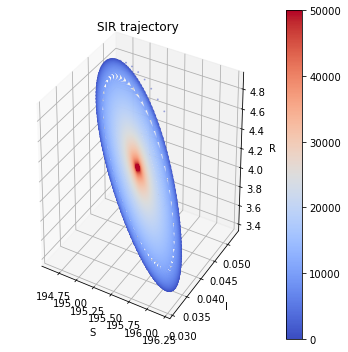

In [30]:
# SIR model parameters
beta = 11.5
A = 20
d = 0.1
nu = 1
b = 0.022 # try to set this to 0.01, 0.020, ..., 0.022, ..., 0.03
mu0 = 10   # minimum recovery rate
mu1 = 10.45  # maximum recovery rate

fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111,projection="3d")


cmap = ["BuPu", "Purples", "bwr"][1]

t_0 = 0
t_end = int(5e4)
time = np.linspace(t_0, t_end, t_end)

SIM0 = [195.3, 0.052, 4.4] # what happens with this initial condition when b=0.022? -- it progresses VERY slowly. Needs t_end to be super large.
sol = solve_ivp(model, t_span=[t_0, t_end], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
#ax.plot(sol.y[0], sol.y[1], sol.y[2], 'r-');
p = ax.scatter(sol.y[0], sol.y[1], sol.y[2], s=1, c=time, cmap='coolwarm');

ax.set_xlabel("S")
ax.set_ylabel("I")
ax.set_zlabel("R")
fig.colorbar(p)


ax.set_title("SIR trajectory") 
fig.tight_layout()

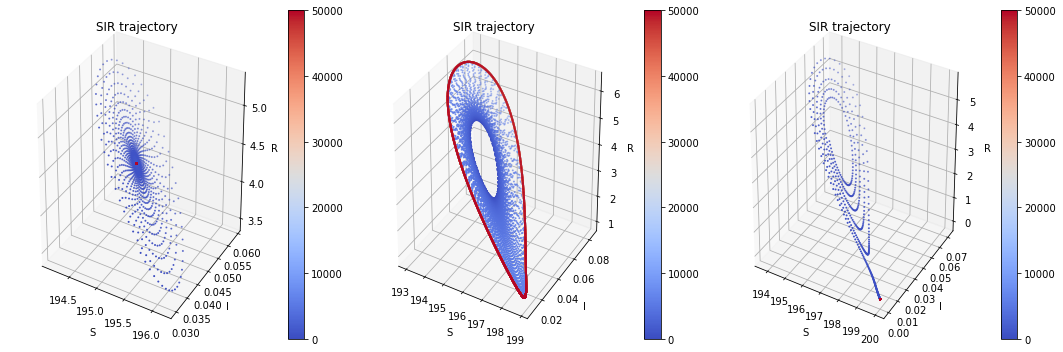

In [38]:
fig=plt.figure(figsize=(15,5))
SIM0 = [195.7, 0.03, 3.92] # what happens with this initial condition when b=0.022?

ax=fig.add_subplot(131,projection="3d")
sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, 0.02), method='DOP853', rtol=rtol, atol=atol)
p = ax.scatter(sol.y[0], sol.y[1], sol.y[2], s=1, c=time, cmap='coolwarm');
ax.set_xlabel("S")
ax.set_ylabel("I")
ax.set_zlabel("R")
ax.set_title("SIR trajectory ") 
fig.colorbar(p)


ax=fig.add_subplot(132,projection="3d")
sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
p = ax.scatter(sol.y[0], sol.y[1], sol.y[2], s=1, c=time, cmap='coolwarm');
ax.set_xlabel("S")
ax.set_ylabel("I")
ax.set_zlabel("R")
ax.set_title("SIR trajectory ") 
fig.colorbar(p)


ax=fig.add_subplot(133,projection="3d")
sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, 0.025), method='DOP853', rtol=rtol, atol=atol)
p = ax.scatter(sol.y[0], sol.y[1], sol.y[2], s=1, c=time, cmap='coolwarm');
ax.set_xlabel("S")
ax.set_ylabel("I")
ax.set_zlabel("R")
ax.set_title("SIR trajectory ") 
fig.colorbar(p)


fig.tight_layout()
plt.show()


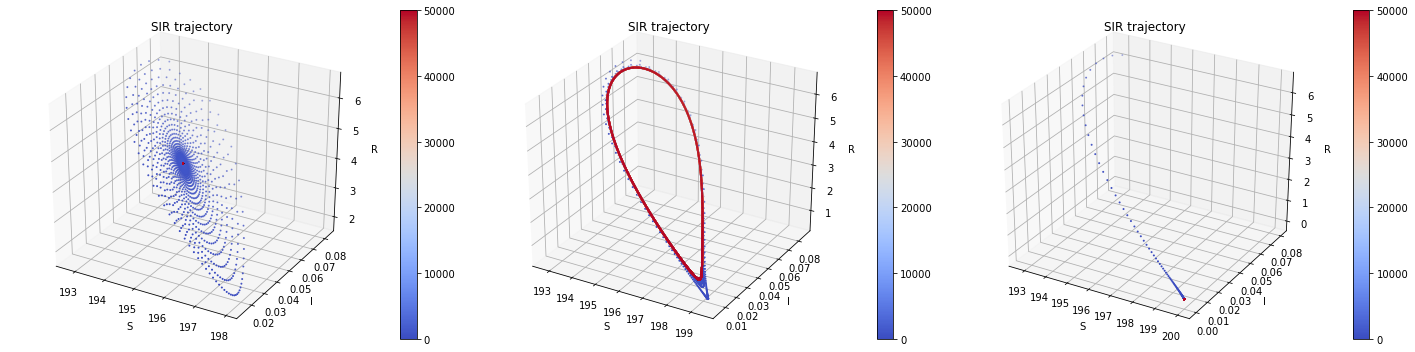

In [37]:
fig=plt.figure(figsize=(20,5))
SIM0 = [193, 0.08, 6.21] # what happens with this initial condition when b=0.022?


ax=fig.add_subplot(131,projection="3d")
sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, 0.02), method='DOP853', rtol=rtol, atol=atol)
p = ax.scatter(sol.y[0], sol.y[1], sol.y[2], s=1, c=time, cmap='coolwarm');
ax.set_xlabel("S")
ax.set_ylabel("I")
ax.set_zlabel("R")
ax.set_title("SIR trajectory") 
fig.colorbar(p)


ax=fig.add_subplot(132,projection="3d")
sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
p = ax.scatter(sol.y[0], sol.y[1], sol.y[2], s=1, c=time, cmap='coolwarm');
ax.set_xlabel("S")
ax.set_ylabel("I")
ax.set_zlabel("R")
ax.set_title("SIR trajectory") 
fig.colorbar(p)


ax=fig.add_subplot(133,projection="3d")
sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, 0.025), method='DOP853', rtol=rtol, atol=atol)
p = ax.scatter(sol.y[0], sol.y[1], sol.y[2], s=1, c=time, cmap='coolwarm');
ax.set_xlabel("S")
ax.set_ylabel("I")
ax.set_zlabel("R")
ax.set_title("SIR trajectory") 
fig.colorbar(p)


fig.tight_layout()
plt.show()

## Tried to make the 2D work but it didn't

In [ ]:
# SIR model parameters
beta = 11.5
A = 20
d = 0.1
nu = 1
b = 0.01 # try to set this to 0.01, 0.020, ..., 0.022, ..., 0.03
mu0 = 10   # minimum recovery rate
mu1 = 10.45  # maximum recovery rate

rtol = 1e-8
atol = 1e-8

t_0 = 0
t_end = int(10e5)
NT = t_end - t_0
time = np.linspace(t_0,t_end,NT)
beta = 0.022

num_iter = int((0.03-0.01)/0.001)



SIM0 = [195.3, 0.052, 4.4] # what happens with this initial condition when b=0.022? -- it progresses VERY slowly. Needs t_end to be super large.

#for i, beta in enumerate(np.arange(0.01, 0.03, 0.001)):
#    beta = round(beta, 4)
#    fig=plt.figure(figsize=(5,5))
#    sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='LSODA', rtol=rtol, atol=atol)
#    plt.plot(sol.y[0], sol.y[1])
#    plt.xlabel("Susceptible")
#    plt.ylabel("Infected")
#    plt.title(f"SIR trajectory for {beta}")

#plt.show()